In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import seaborn as sns
#import warningswarnings.filterwarnings('ignore')
import logging

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


True

In [50]:
medical_cost_dataset=pd.read_csv(filepath_or_buffer='Data\\Medical_cost_personal.csv', )
medical_cost_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
num_missing_values=medical_cost_dataset.isnull().values.sum()
print(f'found {num_missing_values} missing values, missing value will be dropped')

found 0 missing values, missing value will be dropped


In [46]:
medical_cost_dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [47]:
medical_cost_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [42]:
#determining unique values for each non numeric column
print(medical_cost_dataset['sex'].unique())
print(medical_cost_dataset['smoker'].unique())
print(medical_cost_dataset['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [51]:
#we map string values to numeric values, because correlation can only be determined for numeric data
medical_cost_dataset['sex'] = medical_cost_dataset['sex'].map({'female':0, 'male':1})
medical_cost_dataset['smoker'] = medical_cost_dataset['smoker'].map({'no':0, 'yes':1})
medical_cost_dataset['region'] = medical_cost_dataset['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
medical_cost_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


<AxesSubplot:>

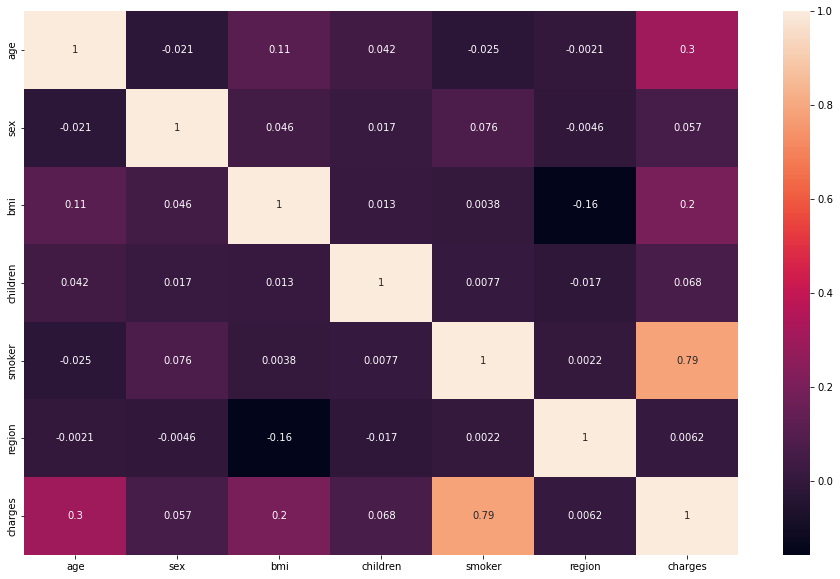

In [52]:
plt.figure(figsize=(16,10))
Var_Corr = medical_cost_dataset.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

We observe biggest correlation between charges and whether patient was a smoker or not, then age takes second place and BMI third.

In [5]:
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

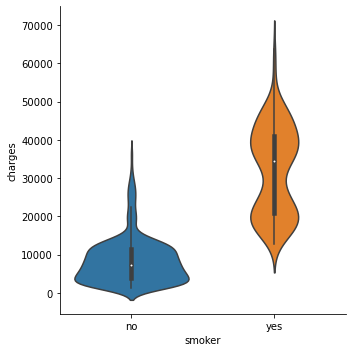

In [63]:
# lets visualize our data
#plt.title("charges and whether a patient was a smoker or not (0 means no, 1 means yes)")
sns.catplot(x='smoker', y='charges', data=medical_cost_dataset, kind="violin")
plt.xticks([0,1],['no','yes'])
plt.show()

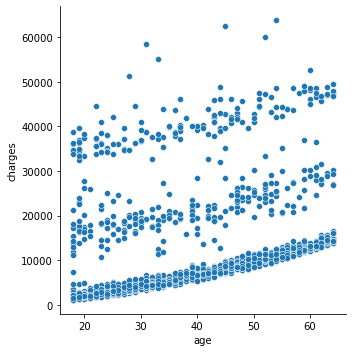

In [66]:
sns.relplot(x='age', y='charges', data=medical_cost_dataset)
#plt.xticks([0,1],['no','yes'])
plt.show()

In [6]:
# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_size,output_size)

    def forward(self,x):
        return self.linear(x)

In [7]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [8]:
# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):

    # optimization
    optimizer.zero_grad()

    # Forward to get output
    results = model(car_price_tensor)

    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)

    # backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # store loss
    loss_list.append(loss.data)

    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 26.197778701782227
epoch 50, loss 5.06606912612915
epoch 100, loss 3.4233551025390625
epoch 150, loss 2.313305616378784
epoch 200, loss 1.5631970167160034
epoch 250, loss 1.0563182830810547
epoch 300, loss 0.713798999786377
epoch 350, loss 0.4823443591594696
epoch 400, loss 0.32594043016433716
epoch 450, loss 0.2202519327402115
epoch 500, loss 0.14883337914943695
epoch 550, loss 0.10057263821363449
epoch 600, loss 0.06796173751354218
epoch 650, loss 0.045924555510282516
epoch 700, loss 0.031033309176564217
epoch 750, loss 0.020970463752746582
epoch 800, loss 0.014170759357511997
epoch 850, loss 0.009575887583196163
epoch 900, loss 0.006470880005508661
epoch 950, loss 0.004372676368802786
epoch 1000, loss 0.002954658353701234


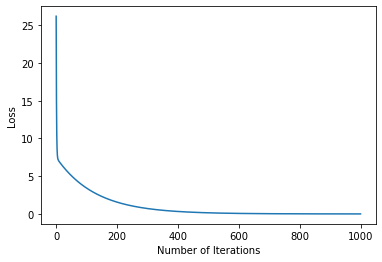

In [9]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()